## Решающие деревья

Это логический алгоритм классификации, решающий задачи классификации и регрессии. Данный алгоритм представляет собой объединение логических условий в структуру дерева.

В зависимости от пространственной структуры данных, один типов моделей из них будет работать лучше:

* Если данные хорошо линейно разделимы,  то линейная модель;
* Если данные линейно неразделимы (присутствуют только кусочно-линейные или нелинейные зависимости), то решающие деревья.


### План семинара:

1. [Задачи](#tasks)
2. [Дерево решений](#decisiontree)
3. [Переобучение](#overfitting)
4. [Неустойчивость](#unstable)
5. [Пример на датасете](#dataset)

### Задачи <a name="tasks"></a>


**Задача 1**. Постройте регрессионное дерево для прогнозирования $y$ с помощью $x$ на обучающей выборке:

||||||
|---|---|---|---|:---:|
|$x_i$|0|1|2|3|
|$y_i$|5|6|4|100|


Критерий деления узла на два — минимизация $RSS$. Дерево строится до трёх терминальных узлов.


**Задача 2**. Постройте регрессионное дерево для прогнозирования $y$ с помощью $x$ на обучающей выборке:

    
|$$y_{i}$$| $$x_{i}$$ |
|:---:|:---:|
|100|1|
|102|2|
|103|3|
|50|4|
|55|5|
|61|6|
|70|7|

Критерий деления узла на два — минимизация $RSS$. Узлы делятся до тех пор, пока в узле остаётся больше двух наблюдений.


**Задача 3**.

Дон-Жуан предпочитает брюнеток. Перед Новым Годом он посчитал, что в записной книжке у него 20 блондинок, 40 брюнеток, две рыжих и восемь шатенок. С Нового Года Дон-Жуан решил перенести все сведения в две записные книжки, в одну — брюнеток, во вторую — остальных.

Как изменились индекс Джини и энтропия в результате такого разбиения?





[Text(0.6, 0.8333333333333334, 'x[0] <= 2.5\nsquared_error = 1692.688\nsamples = 4\nvalue = 28.75'),
 Text(0.4, 0.5, 'x[0] <= 1.5\nsquared_error = 0.667\nsamples = 3\nvalue = 5.0'),
 Text(0.2, 0.16666666666666666, 'squared_error = 0.25\nsamples = 2\nvalue = 5.5'),
 Text(0.6, 0.16666666666666666, 'squared_error = 0.0\nsamples = 1\nvalue = 4.0'),
 Text(0.8, 0.5, 'squared_error = 0.0\nsamples = 1\nvalue = 100.0')]

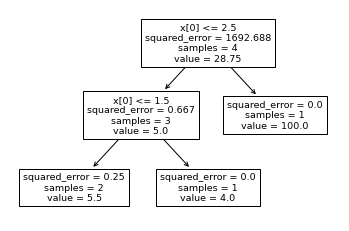

In [1]:
# Задание 1
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
import numpy as np

X = [[0], [1], [2], [3]]
y = [5, 6, 4, 100]

tree = DecisionTreeRegressor(max_leaf_nodes=3)
t = tree.fit(X, y)
plot_tree(t)


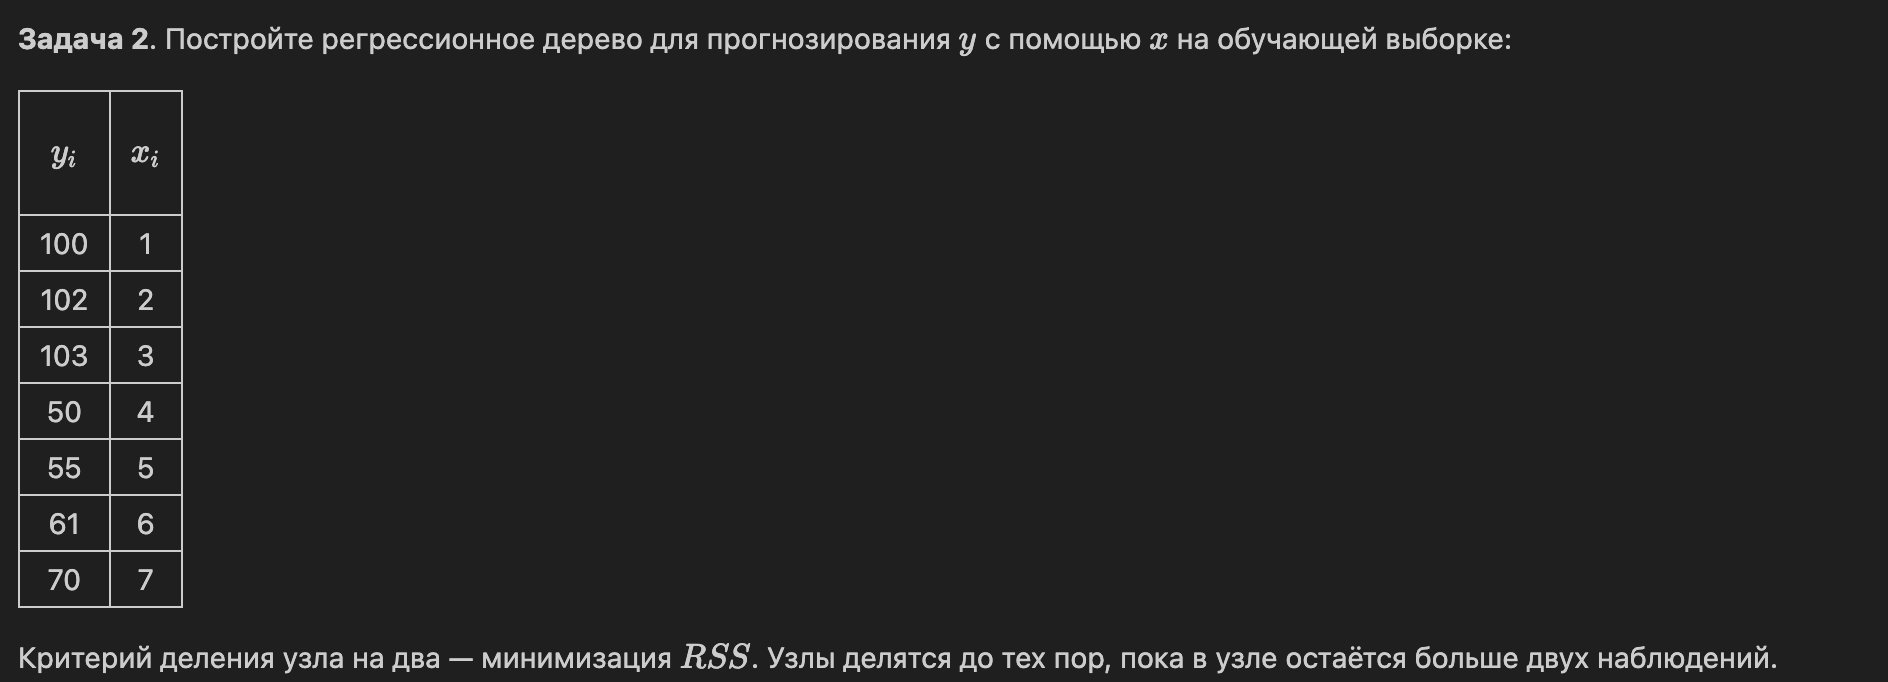

[Text(0.4, 0.8333333333333334, 'x[0] <= 3.5\nsquared_error = 478.204\nsamples = 7\nvalue = 77.286'),
 Text(0.2, 0.5, 'squared_error = 1.556\nsamples = 3\nvalue = 101.667'),
 Text(0.6, 0.5, 'x[0] <= 5.5\nsquared_error = 55.5\nsamples = 4\nvalue = 59.0'),
 Text(0.4, 0.16666666666666666, 'squared_error = 6.25\nsamples = 2\nvalue = 52.5'),
 Text(0.8, 0.16666666666666666, 'squared_error = 20.25\nsamples = 2\nvalue = 65.5')]

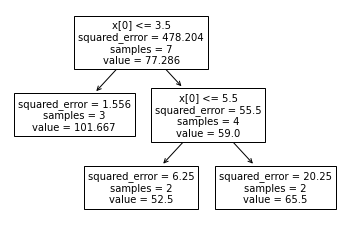

In [2]:
# Задание 2
X = [[1], [2], [3], [4], [5], [6], [7]]
y = [100, 102, 103, 50, 55, 61, 70]

tree = DecisionTreeRegressor(min_samples_leaf=2)
t = tree.fit(X, y)
plot_tree(t)

x[0] <= 3.5: Это условие, которое используется для разделения узла. Если значение x[0] (первый и единственный признак в ваших данных) меньше или равно 3.5, то мы идем к левому поддереву, иначе - к правому.

squared_error = 478.204: Это сумма квадратов ошибок (Residual Sum of Squares, RSS) для всех наблюдений в этом узле. Это мера того, насколько хорошо модель подходит к данным в этом узле.

samples = 7: Это количество наблюдений в этом узле.

value = 77.286: Это среднее значение целевой переменной (y) для всех наблюдений в этом узле. Это значение, которое модель будет прогнозировать для новых наблюдений, которые попадают в этот узел.

Аналогично для остальных узлов

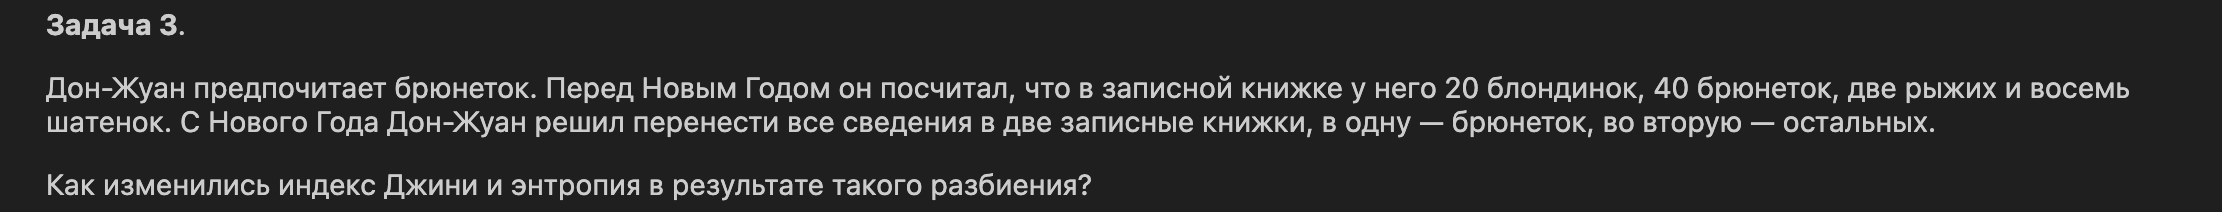


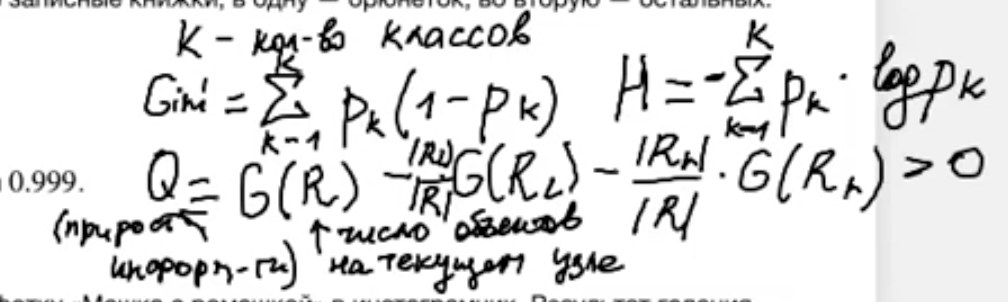

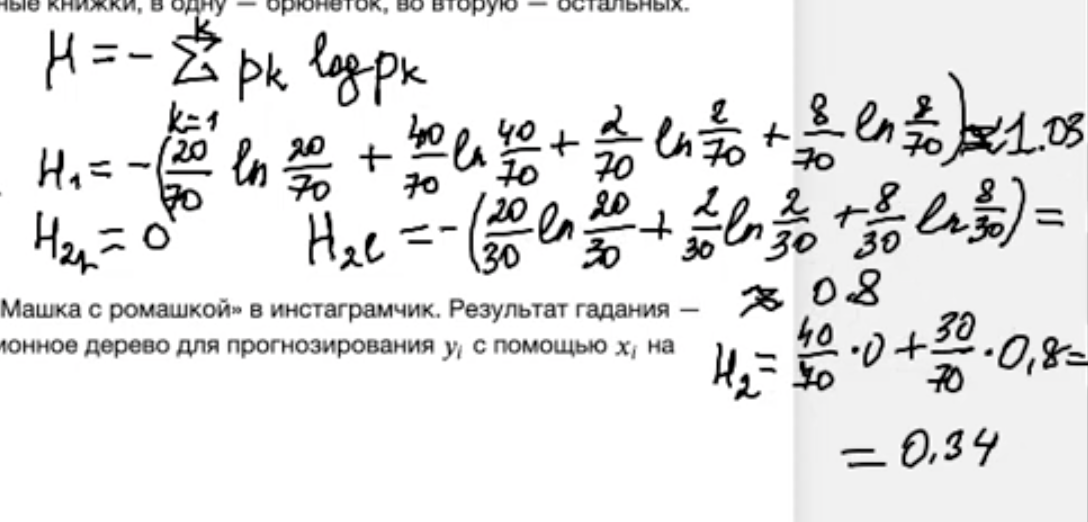

**Задача 4**.

Приведите примеры наборов данных, для которых индекс Джини равен $0$, $0.5$ и $0.999$.

**Задача 5**.

Машка пять дней подряд гадала на ромашке, а затем выкладывала очередную фотку «Машка с ромашкой» в инстаграмчик. Результат гадания — переменная $y_i$, количество лайков у фотки — переменная $x_i$. Постройте классификационное дерево для прогнозирования $y_i$ с помощью $x_i$ на обучающей выборке:

|$$y_{i}$$| $$x_{i}$$ |
|:---:|:---:|
|плюнет|10|
|поцелует|11|
|поцелует|12|
|к сердцу прижмет|13|
|к сердцу прижмет|14|

Дерево строится до идеальной классификации. Критерий деления узла на два — максимальное падение индекса Джини.

[Text(0.6, 0.8333333333333334, 'x[0] <= 12.5\ngini = 0.64\nsamples = 5\nvalue = [2, 1, 2]'),
 Text(0.4, 0.5, 'x[0] <= 10.5\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0]')]

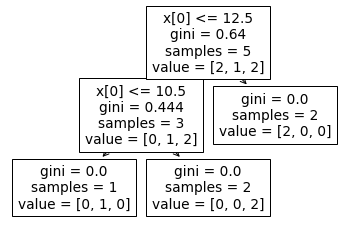

In [4]:
# Задание 5
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
X = [[10], [11], [12], [13], [14]]
y = ['плюнет', 'поцелует', 'поцелует', 'к сердцу прижмет', 'к сердцу прижмет']

# Преобразование текстовых значений y в числовые
le = LabelEncoder()
y = le.fit_transform(y)

tree = DecisionTreeClassifier(criterion='gini')
t = tree.fit(X, y)
plot_tree(t)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_decision_regions
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
import pandas as pd

plt.rcParams["figure.figsize"] = (11, 6.5)

### Дерево решений  <a name="decisiontree"></a>


Давайте сгенерируем пример линейно разделимой выборки для задачи бинарной классификации:

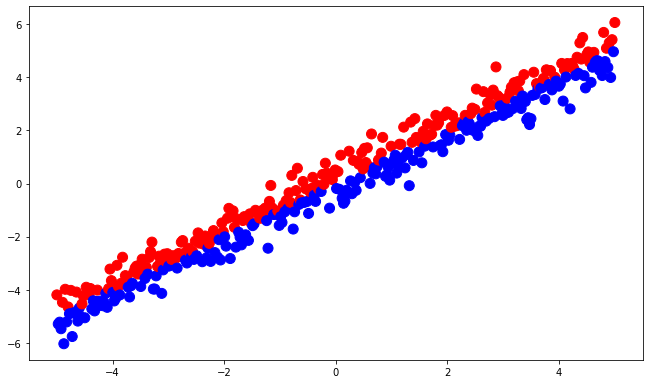

In [7]:
n = 400
np.random.seed(1)
X = np.zeros((n, 2))
X[:, 0] = np.linspace(-5, 5, n)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=n)
y = (X[:, 1] > X[:, 0]).astype(int)

plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap='bwr')
plt.show()

Для удобства, напишем функцию для обучения классификатора и построения графика с разделяющей прямой.

In [8]:
def train_model(model=LogisticRegression()):

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    plot_decision_regions(X_test, y_test, model)
    plt.show()

    print(f"Accuracy: {accuracy_score(y_pred, y_test):.2f}")

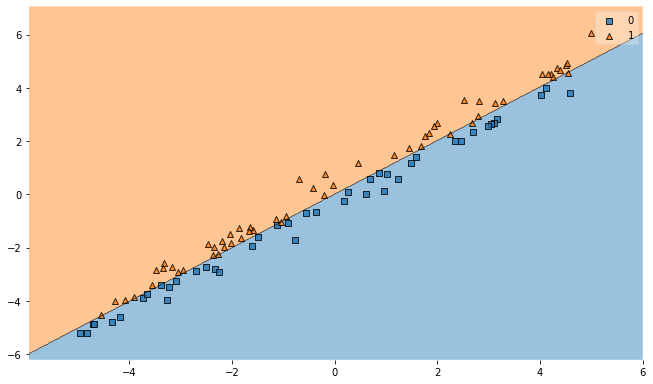

Accuracy: 0.98


In [9]:
train_model(LogisticRegression())

Сравним качество, так ли хорошо получится решить эту задачу не логитической регрессией, а деревом решений на линейно разделимой выборке?

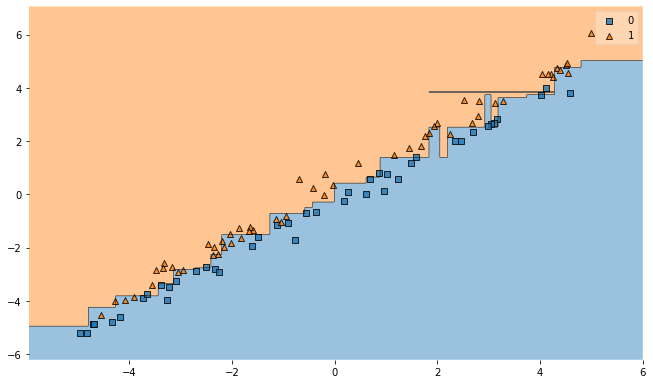

Accuracy: 0.74


In [10]:
train_model(DecisionTreeClassifier(random_state=13))

Давайте вспомним, что такое логическое исключающее ИЛИ, и сгенерируем пример выборки.

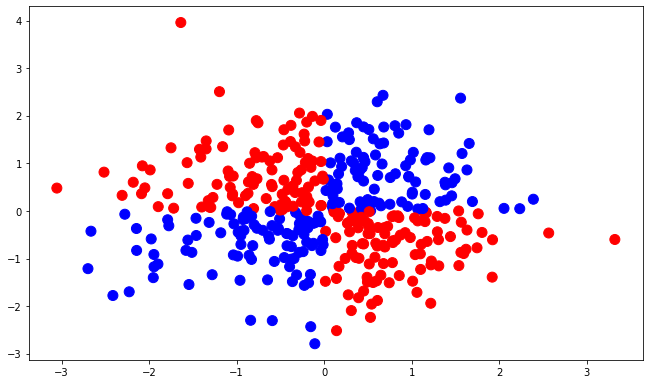

In [11]:
X = np.random.randn(n, 2)
y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="bwr")
plt.show()

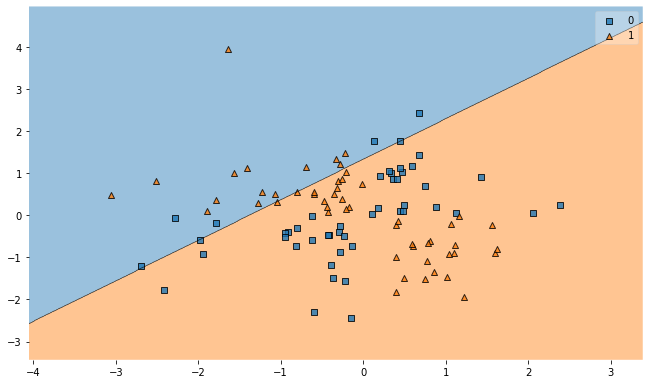

Accuracy: 0.43


In [12]:
train_model(LogisticRegression())

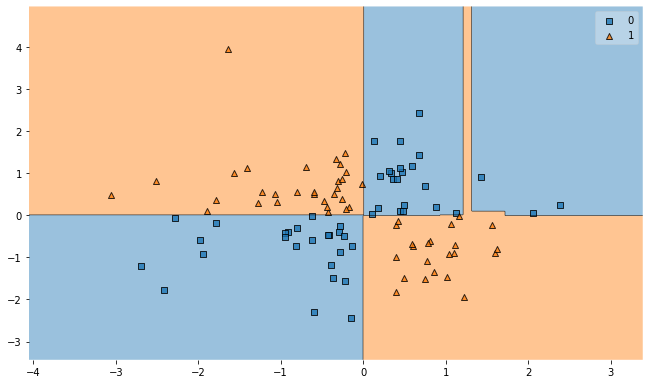

Accuracy: 1.00


In [13]:
train_model(DecisionTreeClassifier())

### Переобучение <a name="overfitting"></a>

Решающие деревья могут переобучаться под любую выборку, если их не регуляризовать: при большом количестве листьев для каждого объекта может выделиться своя область в признаковом пространстве. Дерево просто выучивает обучающую выборку, но не выделяет закономерности в данных. Давайте убедимся в этом на практике.

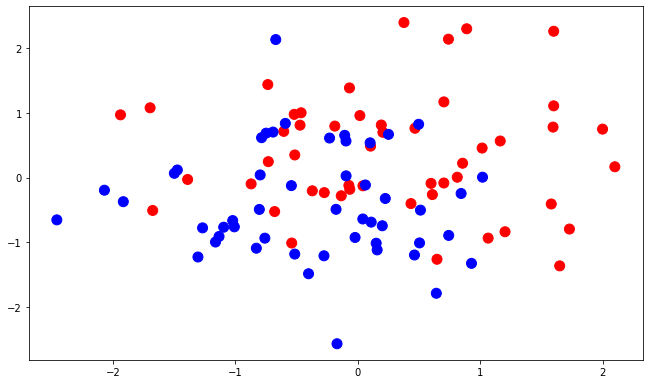

In [14]:
np.random.seed(13)
n = 100
X = np.random.normal(size=(n, 2))
X[:50, :] += 0.25
X[50:, :] -= 0.25
y = np.array([1] * 50 + [0] * 50)
plt.scatter(X[:, 0], X[:, 1], s=100, c=y, cmap="bwr")
plt.show()

Проверим, как разные значения гиперпараметров решающего дерева влияют на его структуру:

- `max_depth`: максимальная глубина дерева
- `min_samples_leaf`: минимальное число объектов в вершине дерева, необходимое для того, чтобы она стала листом

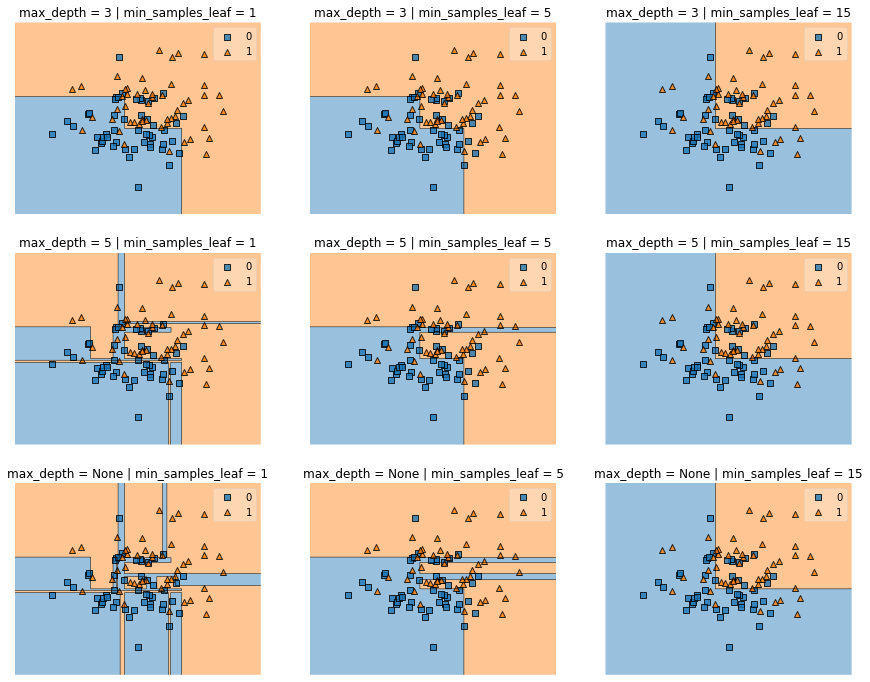

In [15]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, max_depth in enumerate([3, 5, None]):
    for j, min_samples_leaf in enumerate([1, 5, 15]):
        dt = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=13)
        dt.fit(X, y)
        ax[i][j].set_title("max_depth = {} | min_samples_leaf = {}".format(max_depth, min_samples_leaf))
        ax[i][j].axis("off")
        plot_decision_regions(X, y, dt, ax=ax[i][j])

plt.show()

На любой выборке (исключая те, где есть объекты с одинаковыми значениями признаков, но разными ответами) можно получить нулевую ошибку - с помощью максимально переобученного дерева:

Accuracy: 0.74


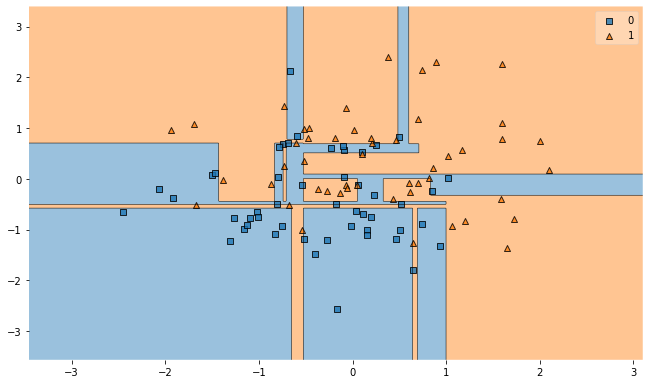

In [16]:
model = DecisionTreeClassifier(max_depth=None, min_samples_leaf=1, random_state=13)
model.fit(X, y)

print(f"Accuracy: {accuracy_score(y, dt.predict(X)):.2f}")

plot_decision_regions(X, y, model)
plt.show()

### Неустойчивость  <a name="unstable"></a>

Как будет меняться структура дерева, если брать для обучения разные 90%-ые подвыборки из исходной?

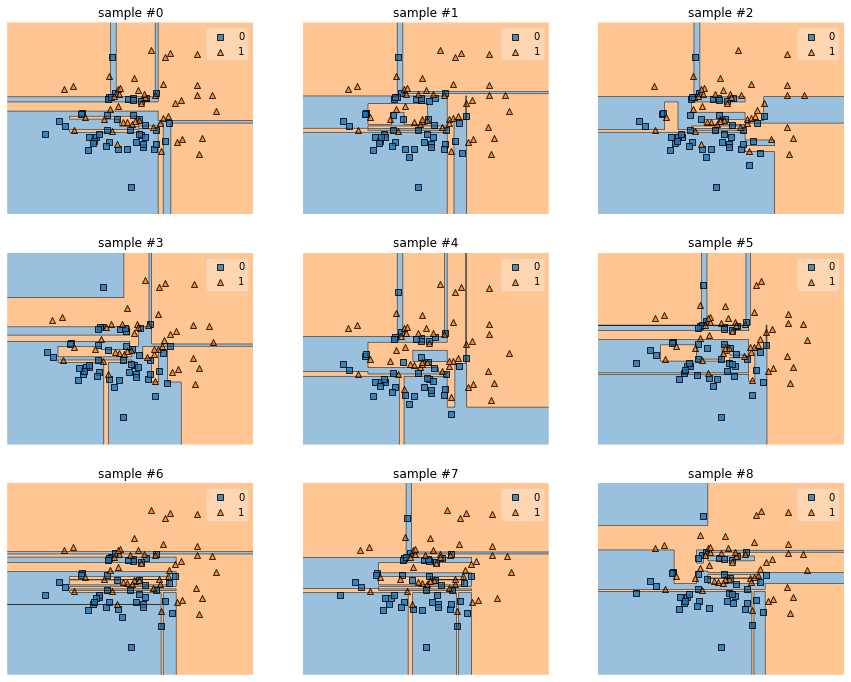

In [17]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i in range(3):
    for j in range(3):
        seed_idx = 3 * i + j
        np.random.seed(seed_idx)
        dt = DecisionTreeClassifier(random_state=13)
        idx_part = np.random.choice(len(X), replace=False, size=int(0.9 * len(X)))
        X_part, y_part = X[idx_part, :], y[idx_part]
        dt.fit(X_part, y_part)
        ax[i][j].set_title("sample #{}".format(seed_idx))
        ax[i][j].axis("off")
        plot_decision_regions(X_part, y_part, dt, ax=ax[i][j])

plt.show()

### Датасет  <a name="dataset"></a>

Построим решающее дерево для какого-нибудь набора данных.

In [37]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

cols = ['CRIM' ,'ZN', 'INDUS',  'CHAS' 'NOX', 'RM' , 'AGE' ,  'DIS' , 'RAD' ,'TAX'  ,  'PTRATIO' , 'B',  'LSTAT' , 'MEDV' ]

X = pd.DataFrame(data, columns=cols)
y = target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

print(f"Shape: {X.shape}")
X.head()

Shape: (506, 13)


,CRIM,ZN,INDUS,CHASNOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


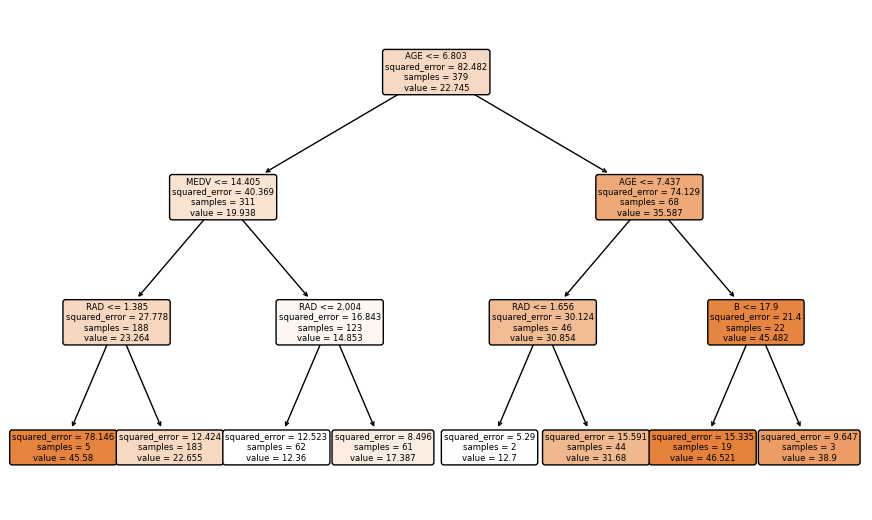

In [38]:
tree = DecisionTreeRegressor(max_depth=3, random_state=13)
tree.fit(X_train, y_train)

plot_tree(tree, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [39]:
round(mean_squared_error(y_test, tree.predict(X_test)), 1)

37.7

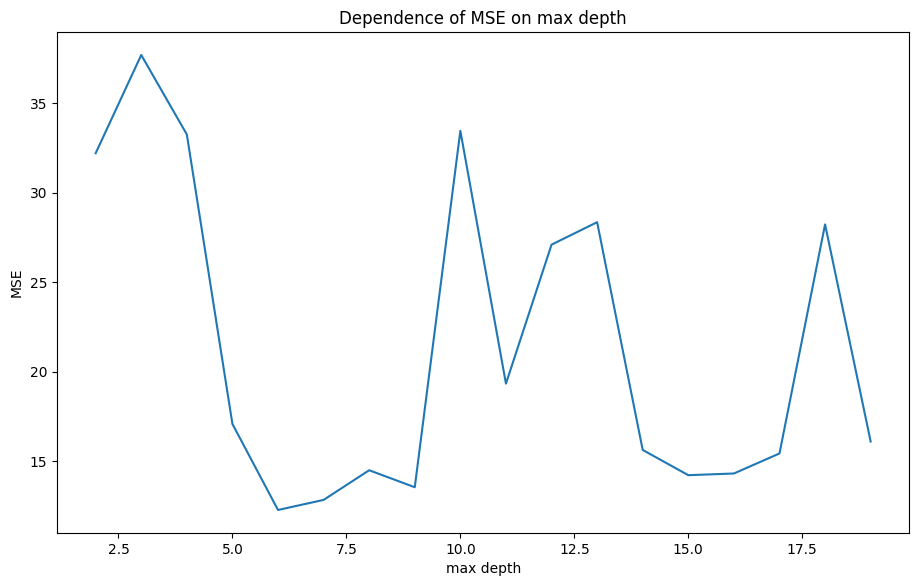

In [40]:
max_depth_array = range(2, 20)
mse_array = []

for max_depth in max_depth_array:
    tree = DecisionTreeRegressor(max_depth=max_depth, random_state=13)
    tree.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, tree.predict(X_test)))

plt.plot(max_depth_array, mse_array)
plt.title("Dependence of MSE on max depth")
plt.xlabel("max depth")
plt.ylabel("MSE")
plt.show()

In [41]:
pd.DataFrame({"max_depth": max_depth_array,"MSE": mse_array}).sort_values(by="MSE").reset_index(drop=True)[:5]

,max_depth,MSE
0,6,12.259769
1,7,12.822513
2,9,13.531328
3,15,14.205564
4,16,14.299599


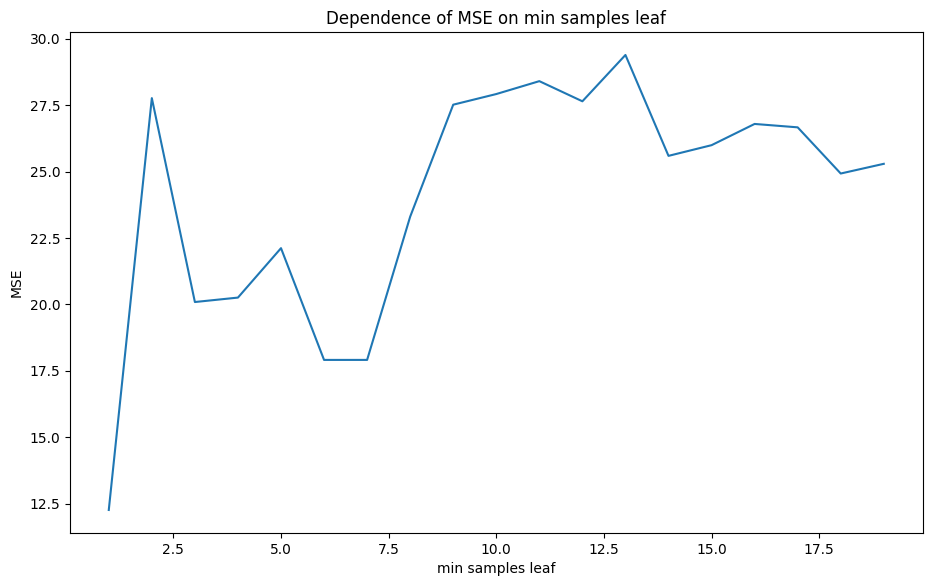

In [42]:
min_samples_leaf_array = range(1, 20)
mse_array = []

for min_samples_leaf in min_samples_leaf_array:
    dt = DecisionTreeRegressor(max_depth=6, min_samples_leaf=min_samples_leaf, random_state=13)
    dt.fit(X_train, y_train)
    mse_array.append(mean_squared_error(y_test, dt.predict(X_test)))

plt.plot(min_samples_leaf_array, mse_array)
plt.title("Dependence of MSE on min samples leaf")
plt.xlabel("min samples leaf")
plt.ylabel("MSE")
plt.show()

In [43]:
pd.DataFrame({"min_samples_leaf": min_samples_leaf_array,"MSE": mse_array}).sort_values(by="MSE").reset_index(drop=True)[:5]

,min_samples_leaf,MSE
0,1,12.259769
1,6,17.908766
2,7,17.909083
3,3,20.088437
4,4,20.255276


## Бонус: решающее дерево своими руками

$R_m$ - множество объектов в разбиваемой вершине, $j$ - номер признака, по которому происходит разбиение, $t$ - порог разбиения.

Критерий ошибки:

$$
Q(R_m, j, t) = \frac{|R_\ell|}{|R_m|}H(R_\ell) + \frac{|R_r|}{|R_m|}H(R_r) \to \min_{j, t}
$$

$R_\ell$ - множество объектов в левом поддереве, $R_r$ - множество объектов в правом поддереве.

$H(R)$ - критерий информативности, с помощью которого можно оценить качество распределения целевой переменной среди объектов множества $R$.

_Реализуйте подсчет критерия ошибки. Для этого реализуйте функции для подсчета значения критерия информативности, а также для разбиения вершины._

In [47]:
import pandas as pd
import numpy as np

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

cols = ['CRIM' ,'ZN', 'INDUS',  'CHAS' 'NOX', 'RM' , 'AGE' ,  'DIS' , 'RAD' ,'TAX'  ,  'PTRATIO' , 'B',  'LSTAT' , 'MEDV' ]

X = pd.DataFrame(data, columns=cols)
X['target'] = target

X_train, X_test = train_test_split(X, test_size=0.25, random_state=13)


In [48]:
from typing import Iterable, List, Tuple

def H(R: pd.DataFrame) -> float:
    """
    Compute impurity criterion for a fixed set of objects R.
    Last column is assumed to contain target value
    """
    return R["target"].var()


def split_node(R_m: np.ndarray, feature: str, t: float) -> Tuple[np.ndarray, np.ndarray]:
    """
    Split a fixed set of objects R_m given feature number and threshold t
    """
    mask = R_m[feature] <= t
    return R_m.loc[mask], R_m.loc[~mask]


def q_error(R_m: np.ndarray, feature: str, t: float) -> float:
    """
    Compute error criterion for given split parameters
    """
    R_l, R_r = split_node(R_m, feature, t)
    return len(R_l) / len(R_m) * H(R_l) + len(R_r) / len(R_m) * H(R_r)

_Переберите все возможные разбиения выборки по одному из признаков и постройте график критерия ошибки в зависимости от значения порога._

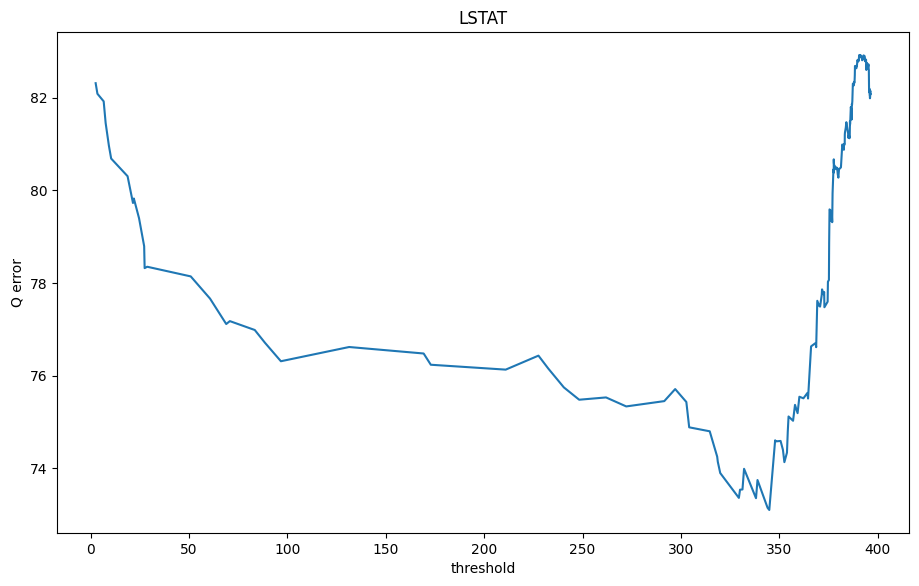

In [49]:
feature = "LSTAT"
Q_array = []

feature_values = np.unique(X_train[feature])
for t in feature_values:
    Q_array.append(q_error(X_train, feature, t))

plt.plot(feature_values, Q_array)
plt.title(feature)
plt.xlabel("threshold")
plt.ylabel("Q error")
plt.show()

_Напишите функцию, находящую оптимальное разбиение данной вершины по данному признаку._

In [50]:
def get_optimal_split(R_m: np.array, feature: str) -> Tuple[float, List[float]]:
    Q_array = []
    feature_values = np.unique(R_m[feature])

    for t in feature_values:
        Q_array.append(q_error(R_m, feature, t))

    Q_array = np.nan_to_num(Q_array, nan=float("+inf"))

    opt_threshold = feature_values[np.argmin(Q_array)]

    return opt_threshold, Q_array

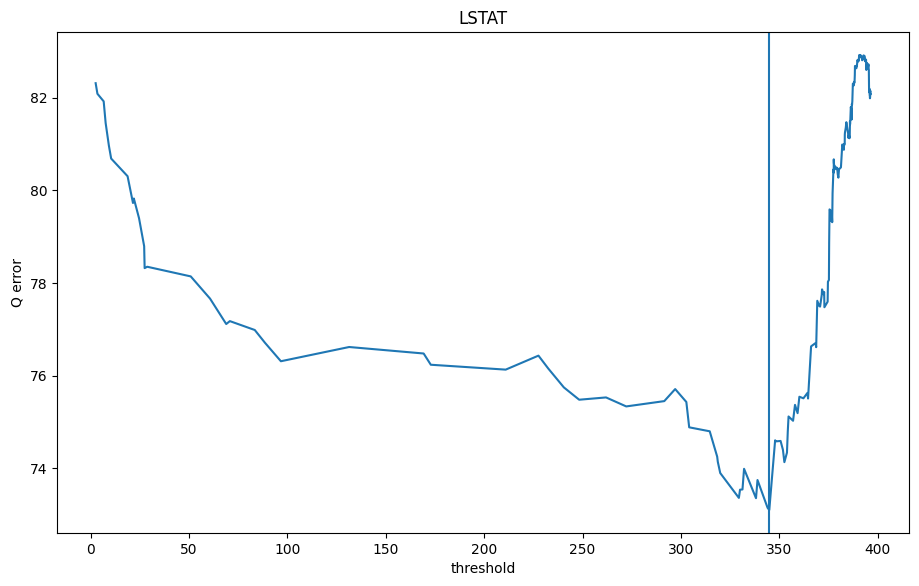

In [51]:
t, Q_array = get_optimal_split(X_train, feature)
plt.plot(np.unique(X_train[feature]), Q_array)
plt.title(feature)
plt.xlabel("threshold")
plt.ylabel("Q error")
plt.axvline(x=t)
plt.show()

_Постройте графики критерия ошибки (в зависимости от количества объектов в левом поддереве) для каждого из признаков. Найдите признак, показывающий наилучшее качество. Какой это признак? Каков порог разбиения и значение качества? Постройте график критерия ошибки для данного признака в зависимости от значения порога._

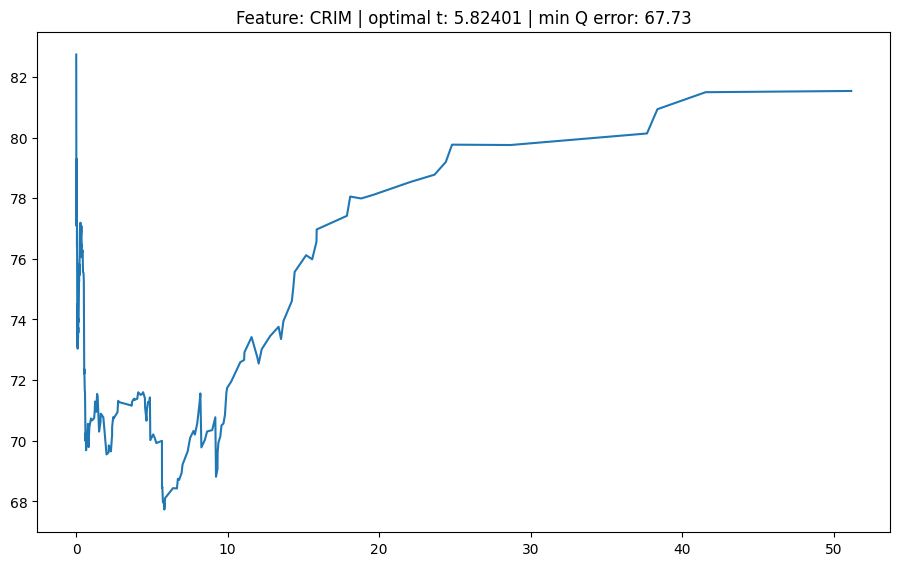

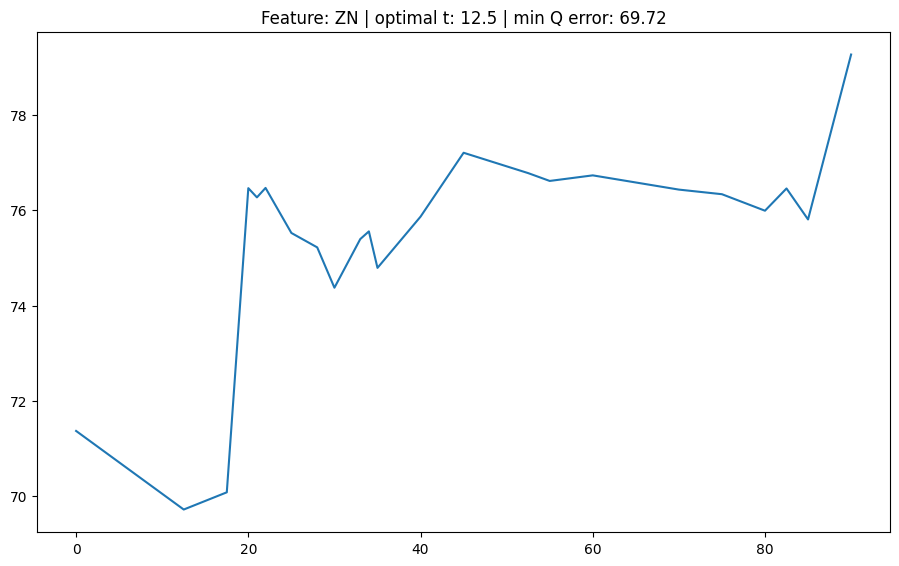

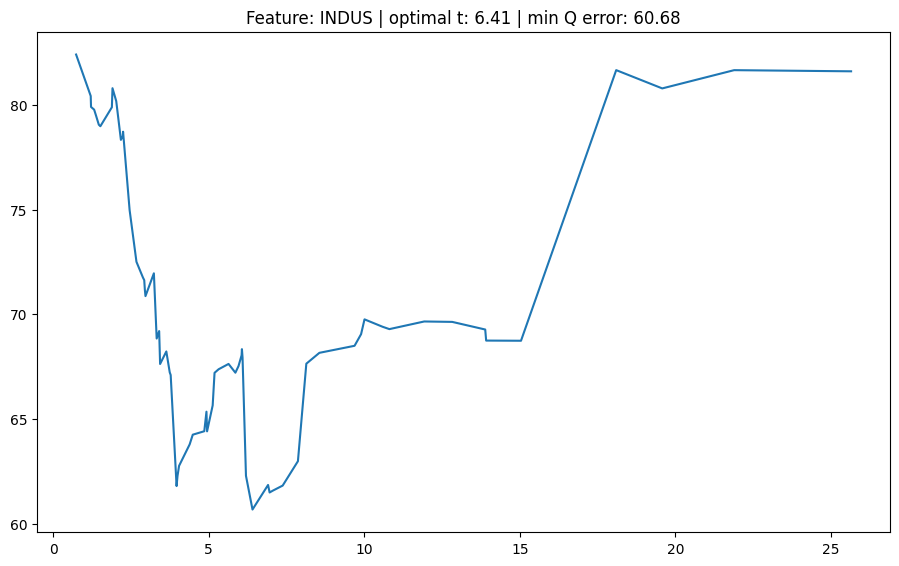

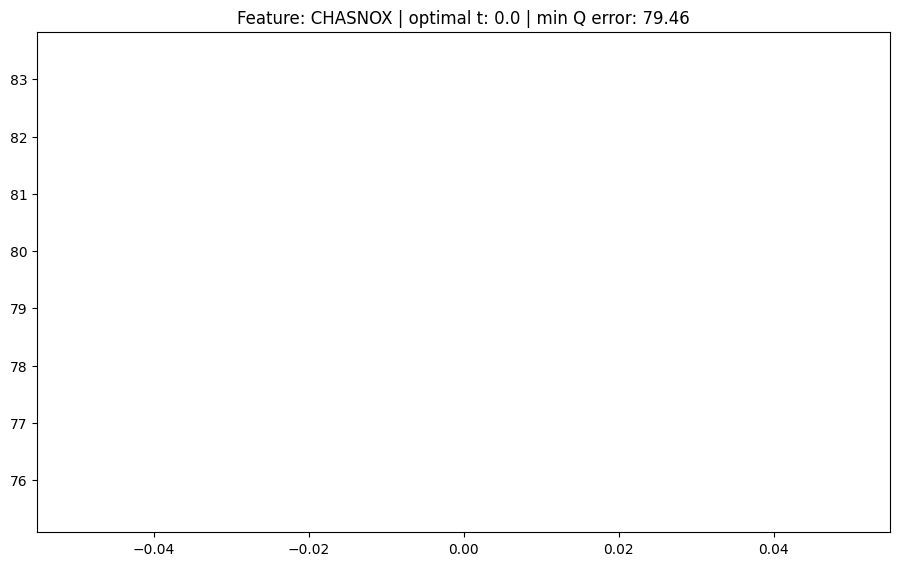

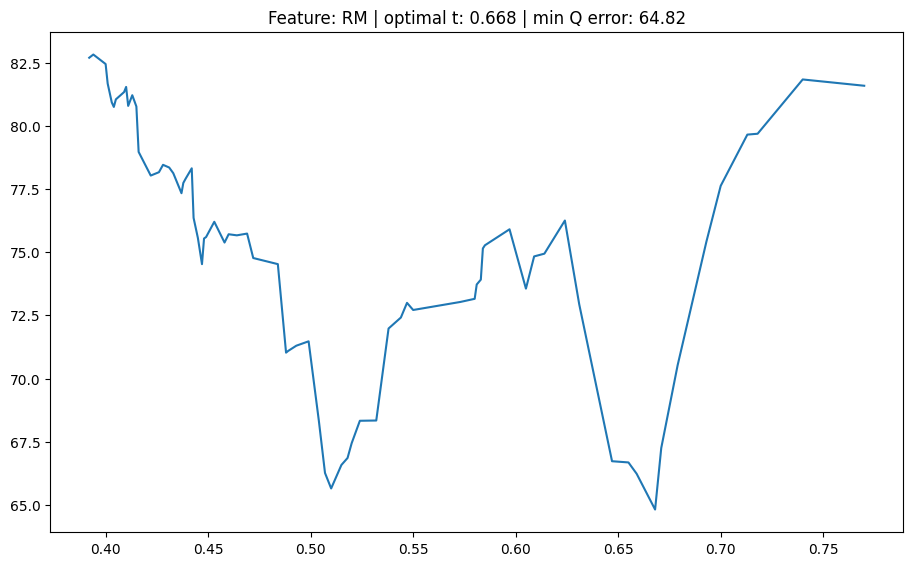

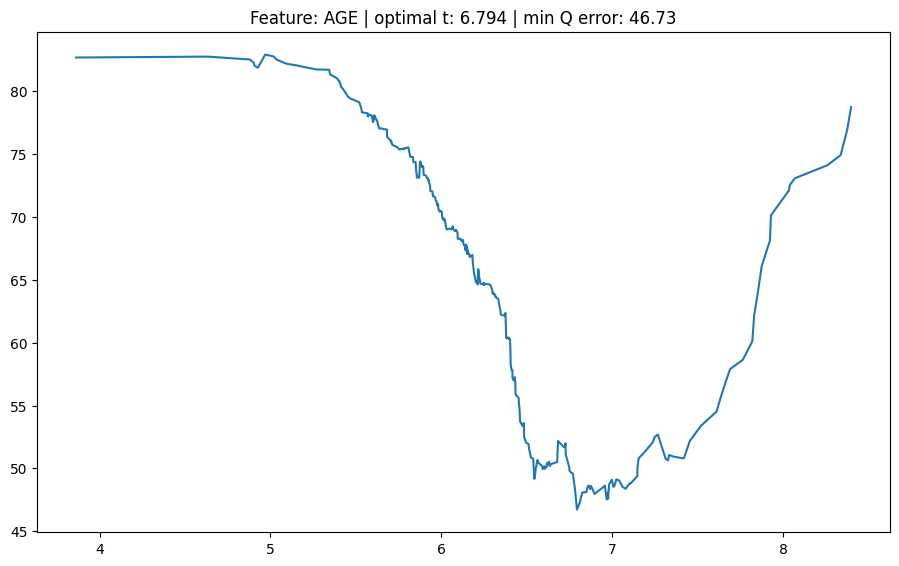

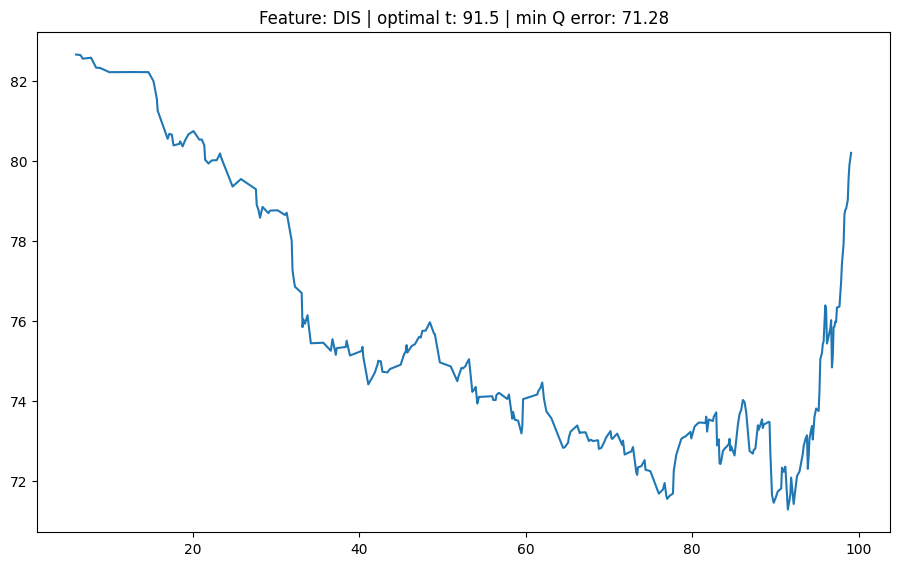

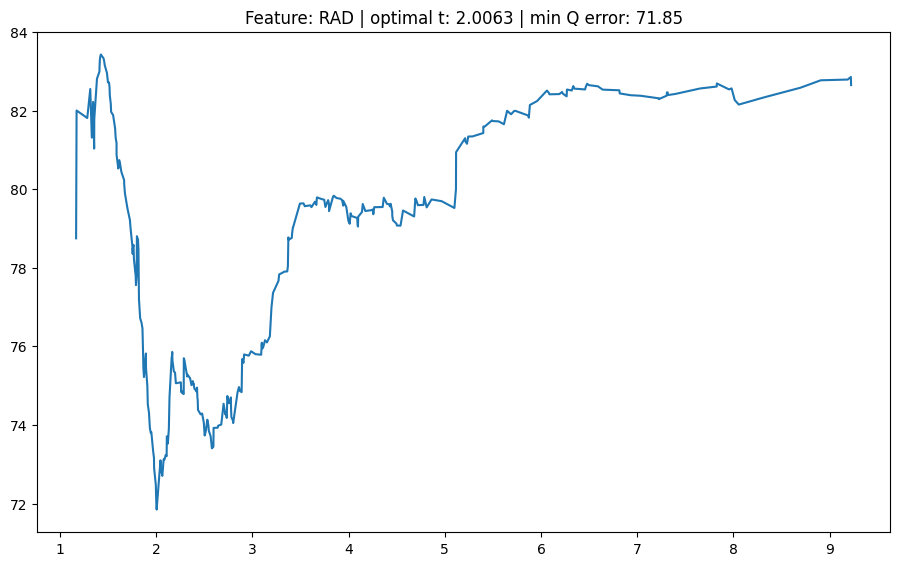

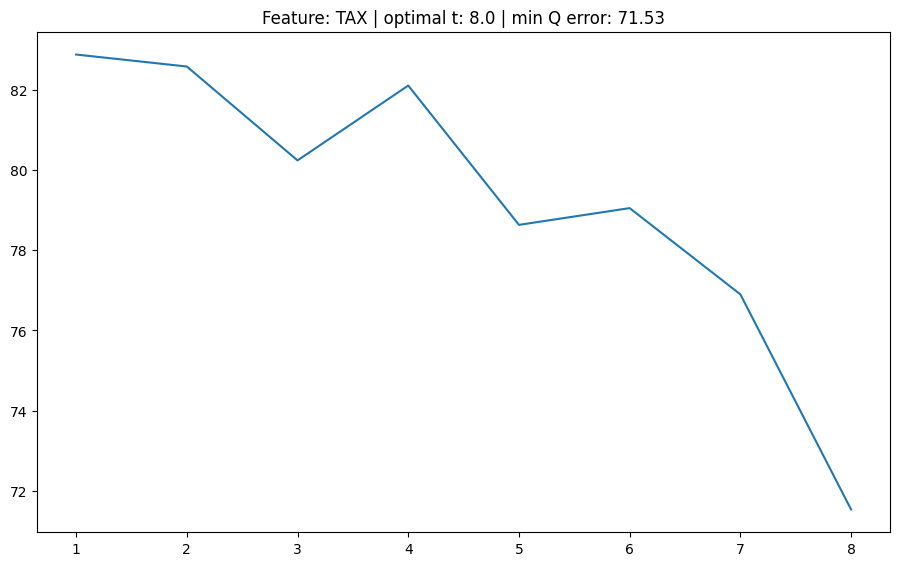

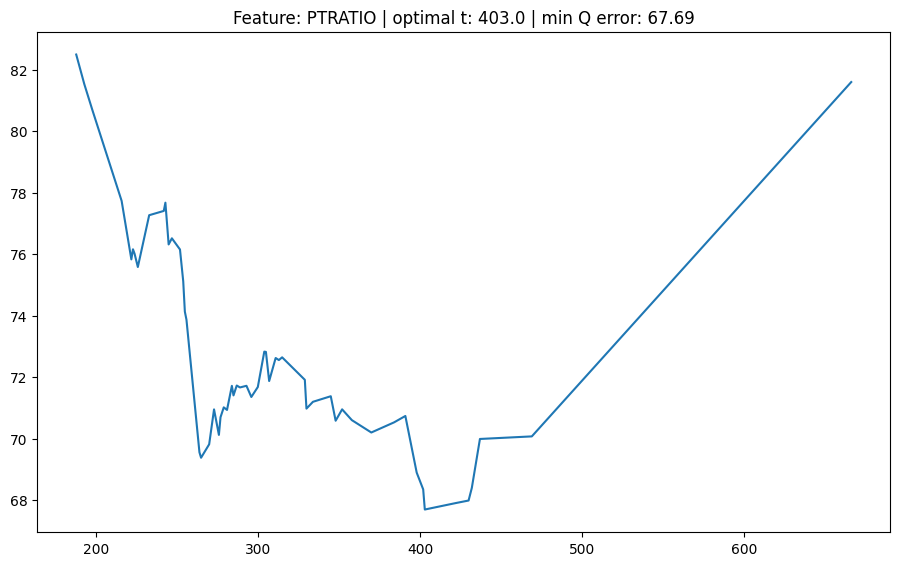

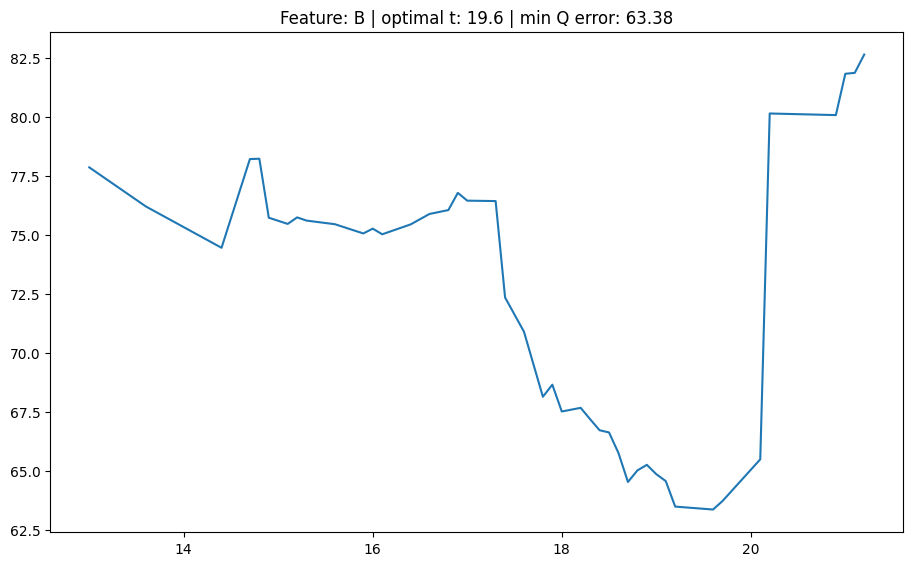

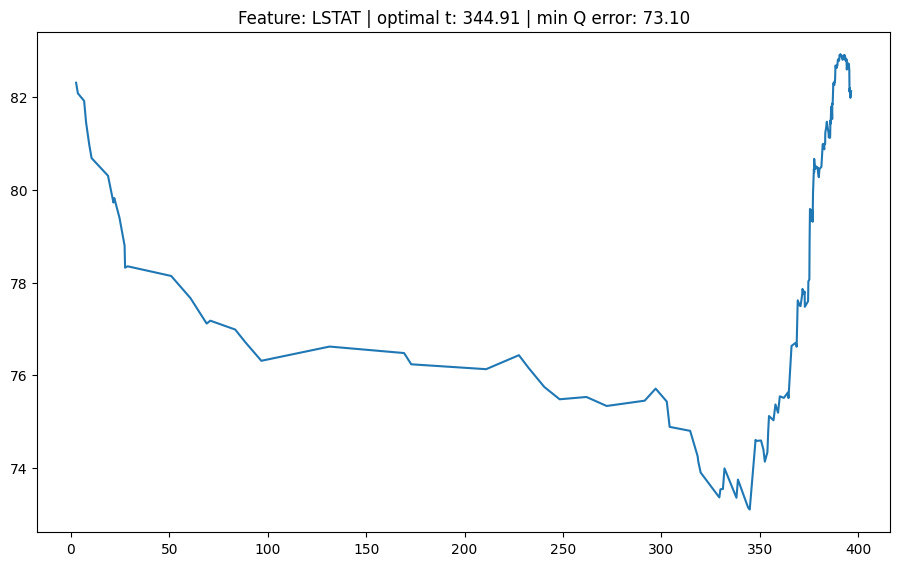

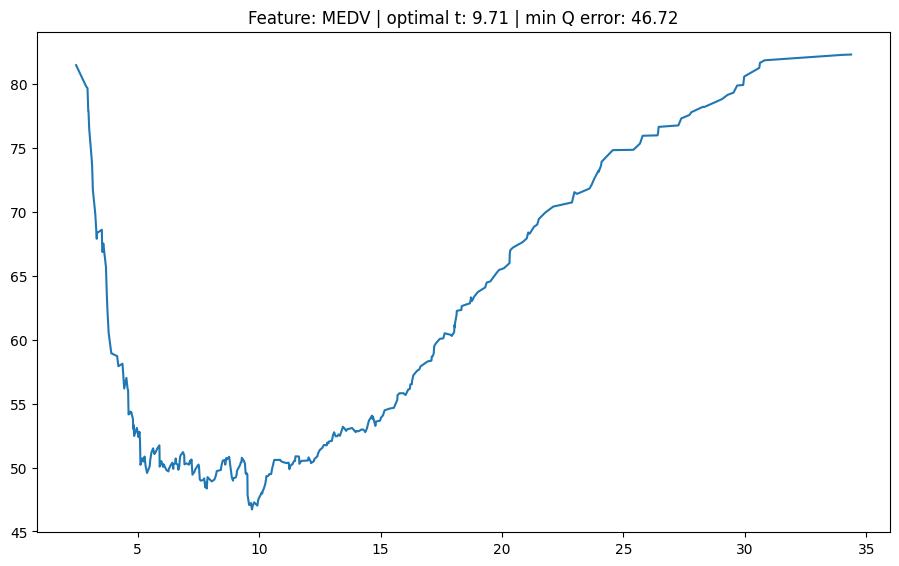

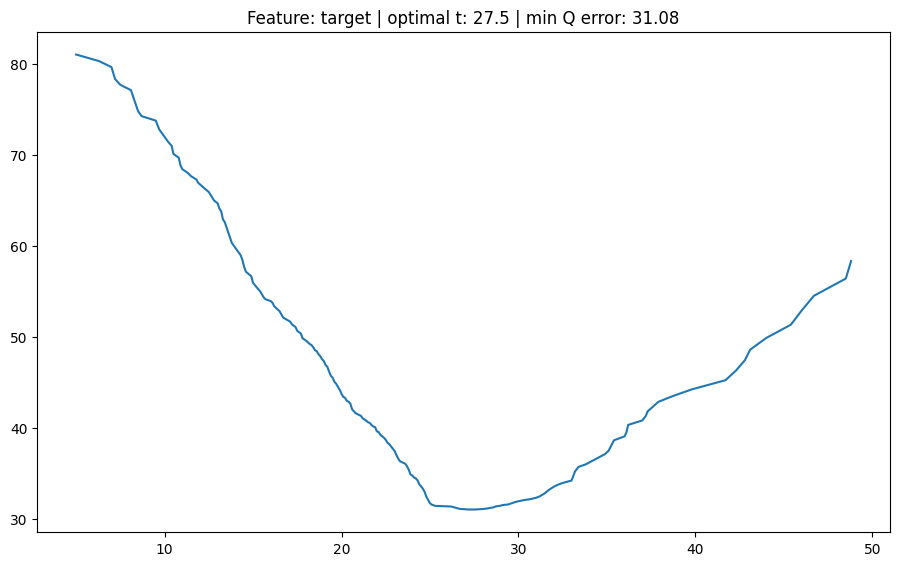

[('target', 27.5, 31.076842051873854),
 ('MEDV', 9.71, 46.71578926625974),
 ('AGE', 6.794, 46.73151006817983),
 ('INDUS', 6.41, 60.679814320810095),
 ('B', 19.6, 63.38235163124333),
 ('RM', 0.668, 64.82160091734985),
 ('PTRATIO', 403.0, 67.69401458031751),
 ('CRIM', 5.82401, 67.73396285468317),
 ('ZN', 12.5, 69.71950632098546),
 ('DIS', 91.5, 71.28166496609492),
 ('TAX', 8.0, 71.52693129585947),
 ('RAD', 2.0063, 71.8487495757931),
 ('LSTAT', 344.91, 73.09628516456316),
 ('CHASNOX', 0.0, 79.46129728972997)]

In [52]:
results = []

for f in X_train.columns:
    t, Q_array = get_optimal_split(X_train, f)
    min_error = min(Q_array)
    results.append((f, t, min_error))
    plt.figure()
    plt.title("Feature: {} | optimal t: {} | min Q error: {:.2f}".format(f, t, min_error))
    plt.plot(np.unique(X_train[f]), Q_array)
    plt.show()

results = sorted(results, key=lambda x: x[2])
results

In [53]:
pd.DataFrame(results, columns=["feature", "optimal t", "min Q error"])

,feature,optimal t,min Q error
0,target,27.50000,31.076842
1,MEDV,9.71000,46.715789
2,AGE,6.79400,46.731510
3,INDUS,6.41000,60.679814
4,B,19.60000,63.382352
5,RM,0.66800,64.821601
6,PTRATIO,403.00000,67.694015
7,CRIM,5.82401,67.733963
8,ZN,12.50000,69.719506
9,DIS,91.50000,71.281665


In [54]:
optimal_feature, optimal_t, optimal_error = results[1]

In [55]:
print(optimal_feature)
print(optimal_t)
print(optimal_error)

MEDV
9.71
46.71578926625974


_Изобразите разбиение визуально. Для этого постройте диаграмму рассеяния целевой переменной в зависимости от значения найденного признака. Далее изобразите вертикальную линию, соответствующую порогу разбиения. Почему это разбиение может быть лучшим? Как вы можете интерпретировать результат?_

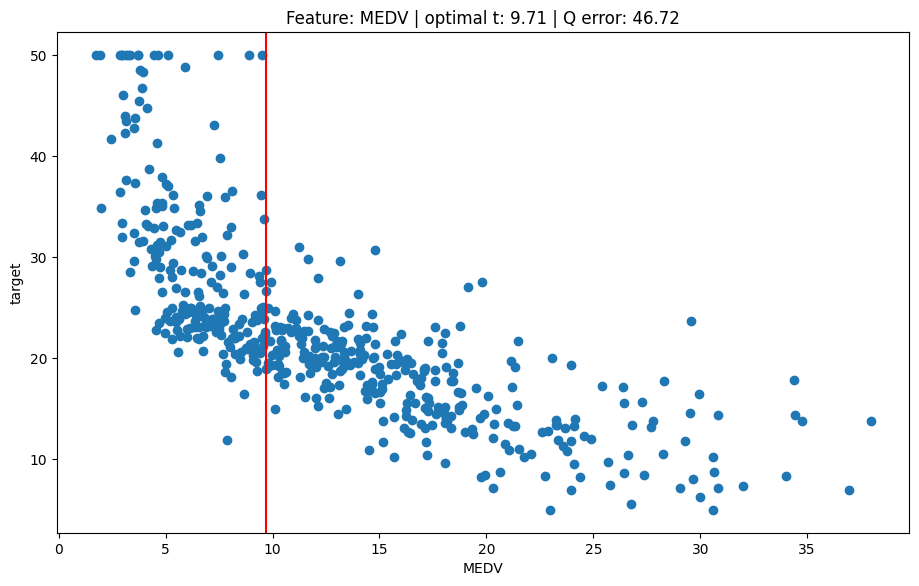

In [56]:
plt.scatter(X[optimal_feature], y)
plt.axvline(x=optimal_t, color="red")
plt.xlabel(optimal_feature)
plt.ylabel("target")
plt.title("Feature: {} | optimal t: {} | Q error: {:.2f}".format(optimal_feature, optimal_t, optimal_error))
plt.show()

## Бонус

Здесь можно посмотреть, как работает стрижка (cost-complexity pruning) для снижения переобучения деревьев: [ноутбук](https://colab.research.google.com/drive/1SGGaIGgo1wOsvBdPfiBb0128emHnu3Oo?usp=sharing).